In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/208.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/473.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/333.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/45.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/369.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/56.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/89.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/20.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/275.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/212.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/239.jpg
/kaggle/input/cityscapes-image-pairs/cityscapes_data/cityscapes_data/val/58.jpg
/kaggle/input/cityscapes-image-pa

Processing complete. Real images saved to 'output_train/real_images' and masks saved to 'output_train/masks'.
Processing complete. Real images saved to 'output_val/real_images' and masks saved to 'output_val/masks'.
Training Improved UNet model...
Epoch 1/10


I0000 00:00:1734326894.950895      97 service.cc:145] XLA service 0x7bb808002100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734326894.950952      97 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734326894.950956      97 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1734326924.096013      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


372/372 ━━━━━━━━━━━━━━━━━━━━ 137s 255ms/step - accuracy: 0.8013 - loss: 1.7929 - val_accuracy: 0.7999 - val_loss: 2.4326
Epoch 2/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 59s 159ms/step - accuracy: 0.9021 - loss: 1.1774 - val_accuracy: 0.8560 - val_loss: 1.4977
Epoch 3/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.9112 - loss: 1.0987 - val_accuracy: 0.8958 - val_loss: 1.2422
Epoch 4/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 58s 157ms/step - accuracy: 0.9173 - loss: 1.0516 - val_accuracy: 0.9104 - val_loss: 1.1463
Epoch 5/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.9211 - loss: 1.0116 - val_accuracy: 0.9077 - val_loss: 1.1638
Epoch 6/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 59s 158ms/step - accuracy: 0.9245 - loss: 0.9862 - val_accuracy: 0.9125 - val_loss: 1.1068
Epoch 7/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 59s 157ms/step - accuracy: 0.9251 - loss: 0.9607 - val_accuracy: 0.9052 - val_loss: 1.1693
Epoch 8/10
372/372 ━━━━━━━━━━━━━━━━━━━━ 58s 157ms/step - accuracy: 0.9275 - loss: 0.9508 - va

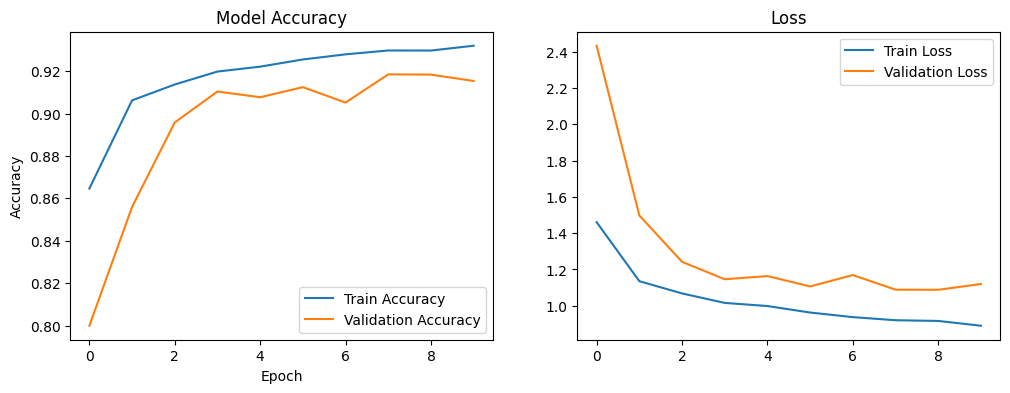

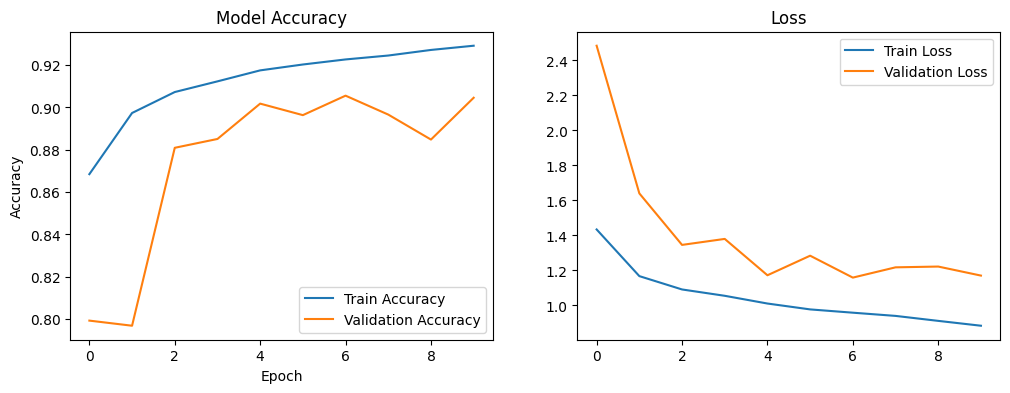

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import numpy as np

##Data Preparation##

def process_dataset(input_dir, output_dir):


    real_image_dir = os.path.join(output_dir, 'real_images')
    mask_image_dir = os.path.join(output_dir, 'masks')
    os.makedirs(real_image_dir, exist_ok=True)
    os.makedirs(mask_image_dir, exist_ok=True)


    for file_name in os.listdir(input_dir):

        if file_name.endswith('.jpg'):
            file_path = os.path.join(input_dir, file_name)
            full_image = Image.open(file_path)

            width, height = full_image.size

            real_image = full_image.crop((0, 0, width // 2, height))
            mask_image = full_image.crop((width // 2, 0, width, height))

            real_image.save(os.path.join(real_image_dir, f'real_{file_name}'))
            mask_image.save(os.path.join(mask_image_dir, f'mask_{file_name}'))

    print(f"Processing complete. Real images saved to '{real_image_dir}' and masks saved to '{mask_image_dir}'.")


train_dir = r'/kaggle/input/cityscapes-image-pairs/cityscapes_data/train/'
val_dir = r'/kaggle/input/cityscapes-image-pairs/cityscapes_data/val/'
output_train_dir = 'output_train'
output_val_dir = 'output_val'


process_dataset(train_dir, output_train_dir)
process_dataset(val_dir, output_val_dir)



def load_images(image_dir, target_size=(128, 128)):
    """Load and preprocess images"""
    if not os.path.exists(image_dir):
        raise ValueError(f"Directory '{image_dir}' does not exist")
        
    images = []
    for file_name in sorted(os.listdir(image_dir)):
        if file_name.endswith(('.png', '.jpg')):
            try:
                img_path = os.path.join(image_dir, file_name)
                img = load_img(img_path, target_size=target_size)
                img_array = img_to_array(img) / 255.0
                images.append(img_array)
            except Exception as e:
                print(f"Error loading {file_name}: {str(e)}")
                
    if not images:
        raise ValueError(f"No valid images found in {image_dir}")
    return np.array(images)

def load_masks(image_dir, target_size=(128, 128), num_classes=3):
    """Load and preprocess mask images"""
    if not os.path.exists(image_dir):
        raise ValueError(f"Directory '{image_dir}' does not exist")
        
    masks = []
    for file_name in sorted(os.listdir(image_dir)):
        if file_name.endswith(('.png', '.jpg')):
            try:
                img_path = os.path.join(image_dir, file_name)
                img = load_img(img_path, target_size=target_size, color_mode="grayscale")
                img_array = img_to_array(img)[:, :, 0]
                masks.append(img_array)
            except Exception as e:
                print(f"Error loading mask {file_name}: {str(e)}")
                
    if not masks:
        raise ValueError(f"No valid masks found in {image_dir}")
    
    masks = np.array(masks)
    
    masks = np.round(masks * (num_classes - 1) / 255.0).astype(np.int32)
    
    if len(masks.shape) == 3:
        masks = masks[..., np.newaxis]
        
    return masks


X_train = load_images(os.path.join(output_train_dir, 'real_images'))
y_train = load_masks(os.path.join(output_train_dir, 'masks'), num_classes=3)
X_val = load_images(os.path.join(output_val_dir, 'real_images'))
y_val = load_masks(os.path.join(output_val_dir, 'masks'), num_classes=3)

def dice_loss(y_true, y_pred):
    
    """Calculate Dice loss"""
    
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    y_true = tf.reshape(y_true, [-1, tf.shape(y_true)[-1]])
    y_pred = tf.reshape(y_pred, [-1, tf.shape(y_pred)[-1]])
    
    intersection = tf.reduce_sum(y_true * y_pred, axis=0)
    return 1 - (2. * intersection + 1) / (tf.reduce_sum(y_true, axis=0) + tf.reduce_sum(y_pred, axis=0) + 1)

def iou_loss(y_true, y_pred):
    
    """Calculate IoU loss"""
    
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    y_true = tf.reshape(y_true, [-1, tf.shape(y_true)[-1]])
    y_pred = tf.reshape(y_pred, [-1, tf.shape(y_pred)[-1]])
    
    intersection = tf.reduce_sum(y_true * y_pred, axis=0)
    union = tf.reduce_sum(y_true, axis=0) + tf.reduce_sum(y_pred, axis=0) - intersection
    return 1 - (intersection + 1) / (union + 1)

def combined_loss(y_true, y_pred):
    
    """Combined loss function using TensorFlow control flow"""
    
    def convert_to_onehot():
        y_true_int = tf.cast(y_true[..., 0], tf.int32)
        return tf.one_hot(y_true_int, depth=tf.shape(y_pred)[-1])
    
    y_true_processed = tf.cond(
        tf.equal(tf.shape(y_true)[-1], tf.shape(y_pred)[-1]),
        lambda: tf.cast(y_true, tf.float32),
        convert_to_onehot
    )
    
    y_pred_float = tf.cast(y_pred, tf.float32)
   
    ce_loss = CategoricalCrossentropy()(y_true_processed, y_pred_float)
    dice = tf.reduce_mean(dice_loss(y_true_processed, y_pred_float))
    iou = tf.reduce_mean(iou_loss(y_true_processed, y_pred_float))
    
    return ce_loss + dice + iou

def attention_gate(x, g, in_filters, out_filters):
    
    """Attention gate mechanism"""
    
    theta_x = layers.Conv2D(out_filters, (1, 1), padding='same')(x)
    phi_g = layers.Conv2D(out_filters, (1, 1), padding='same')(g)   
    
    f = layers.Activation('relu')(layers.add([theta_x, phi_g]))
    psi_f = layers.Conv2D(out_filters, (1, 1), padding='same')(f)
    
    rate = layers.Activation('sigmoid')(psi_f)
    return layers.multiply([x, rate])


def improved_unet(input_shape=(128, 128, 3), num_classes=3):
    
    """Improved U-Net model with attention gates"""
    
    inputs = layers.Input(shape=input_shape)

    # Encoder#
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.BatchNormalization()(c1)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    c1 = layers.BatchNormalization()(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.BatchNormalization()(c2)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    c2 = layers.BatchNormalization()(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.BatchNormalization()(c3)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    c3 = layers.BatchNormalization()(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.BatchNormalization()(c4)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    c4 = layers.BatchNormalization()(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    # Bottleneck#
    bottleneck = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    bottleneck = layers.BatchNormalization()(bottleneck)
    bottleneck = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(bottleneck)
    bottleneck = layers.BatchNormalization()(bottleneck)

    # Decoder with attention#
    u1 = layers.Conv2DTranspose(512, (3, 3), strides=(2, 2), padding='same')(bottleneck)
    u1 = attention_gate(c4, u1, 512, 512)
    u1 = layers.Concatenate()([u1, c4])
    u1 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u1)
    u1 = layers.BatchNormalization()(u1)

    u2 = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same')(u1)
    u2 = attention_gate(c3, u2, 256, 256)
    u2 = layers.Concatenate()([u2, c3])
    u2 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u2)
    u2 = layers.BatchNormalization()(u2)

    u3 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(u2)
    u3 = attention_gate(c2, u3, 128, 128)
    u3 = layers.Concatenate()([u3, c2])
    u3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u3)
    u3 = layers.BatchNormalization()(u3)

    u4 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(u3)
    u4 = attention_gate(c1, u4, 64, 64)
    u4 = layers.Concatenate()([u4, c1])
    u4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u4)
    u4 = layers.BatchNormalization()(u4)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(u4)

    model = models.Model(inputs, outputs)
    model.compile(
        optimizer='adam',
        loss=combined_loss,
        metrics=['accuracy']
    )
    return model

def segnet(input_shape=(128, 128, 3), num_classes=3):
    
    """SegNet model implementation"""
    
    inputs = layers.Input(input_shape)

    # Encoder#
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.BatchNormalization()(c1)
    p1 = layers.MaxPooling2D((2, 2), padding='same')(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.BatchNormalization()(c2)
    p2 = layers.MaxPooling2D((2, 2), padding='same')(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.BatchNormalization()(c3)
    p3 = layers.MaxPooling2D((2, 2), padding='same')(c3)

    # Decoder#
    u3 = layers.UpSampling2D((2, 2))(p3)
    u3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u3)
    u3 = layers.BatchNormalization()(u3)

    u2 = layers.UpSampling2D((2, 2))(u3)
    u2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u2)
    u2 = layers.BatchNormalization()(u2)

    u1 = layers.UpSampling2D((2, 2))(u2)
    u1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u1)
    u1 = layers.BatchNormalization()(u1)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(u1)
    
    model = models.Model(inputs, outputs)
    model.compile(
        optimizer='adam',
        loss=combined_loss,
        metrics=['accuracy']
    )
    return model



@tf.function
def train_step(model, x, y):
    
    """Single training step with gradient tape"""
    
    with tf.GradientTape() as tape:
        predictions = model(x, training=True)
        loss = combined_loss(y, predictions)
    
    gradients = tape.gradient(loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss



def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=8, log_dir="logs"):
    
    os.makedirs(log_dir, exist_ok=True)
    tensorboard_cb = TensorBoard(log_dir=os.path.join(log_dir, datetime.now().strftime("%Y%m%d-%H%M%S")))
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
        .shuffle(buffer_size=1024)\
        .batch(batch_size)
    
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))\
        .batch(batch_size)
    
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=[tensorboard_cb]
    )
    return history

def plot_training(history,model,X_test,y_test):

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show
    
    
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:}")
    print(f"Test Accuracy: {test_accuracy:}")

if __name__ == "__main__":
    
    
    save_directory = r'/kaggle/working/'
    os.makedirs(save_directory, exist_ok=True)  

    
    
    
    print("Training Improved UNet model...")
    model_improved_unet = improved_unet()
    history_unet = train_model(model_improved_unet, X_train, y_train, X_val, y_val, log_dir="logs")
    model_improved_unet_path = os.path.join(save_directory, "improved_unet_model.keras")
    model_improved_unet.save(model_improved_unet_path)
    print(f"Improved UNet model saved to {model_improved_unet_path}")
    plot_training(history_unet, model_improved_unet, X_val, y_val)

    
    
    
    print("Training SegNet model...")
    model_segnet = segnet()
    history_segnet = train_model(model_segnet, X_train, y_train, X_val, y_val, log_dir="logs")
    model_segnet_path = os.path.join(save_directory, "segnet_model.keras")
    model_segnet.save(model_segnet_path)
    print(f"SegNet model saved to {model_segnet_path}")
    plot_training(history_segnet, model_segnet, X_val, y_val)